### Clasificadores elaborados por lenguaje supervisado

> 19/01/2021

> David A. García Espinosa

### Bases de datos de pruebas

In [ ]:
import mglearn as mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


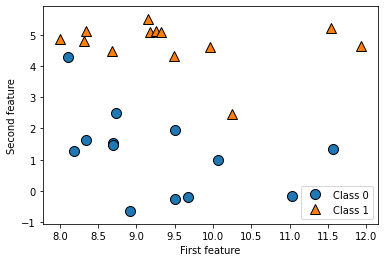

In [ ]:
# generar el dataset proveniente de mglearn
X, y = mglearn.datasets.make_forge()

# plot 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

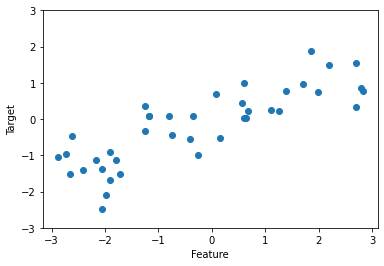

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Feature names:\n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Vecinos cercanos (KNN)

> En pocas palabras es el modelo más sencillo de clasifiación por lenguaje supervisado debido a su simplicidad, encontrar los elementos más cercanos entre estos.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Característica 2')

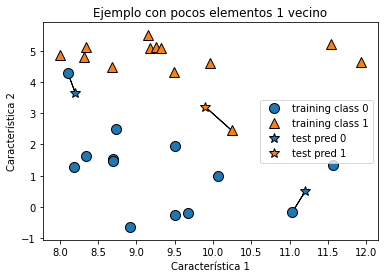

In [ ]:

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title('Ejemplo con pocos elementos 1 vecino')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Característica 2')

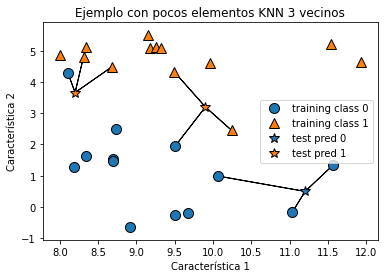

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.title('Ejemplo con pocos elementos KNN 3 vecinos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')


> De esta forma podemos ver que el modelo mide que elemento del conjunto de entrenamiento se encunra más cercao del set de datos de prueba, para este caso sólo se considera un elemento cercano (con distancia mínima entre los dos), sin embargo puede realizarse par 3,4,5...k vecinos de ahí que venga el nombre de vecinos cercanos.

> Entonces para el caso de k veciones y una clase positivo o negativa se asginará una clasificación a una de estas categorías para todos los elementos del set de prueba, siendo que para el mayor número de  veciones con esa categoría será la categoría asignada.


In [ ]:
#Utilizando el mismo set de ejemplo preparamos el set de datos para la aplicación del modelo 
# Lo primero es una segmentación de la base de datos para tener un set de prueba y uno de entrenaiento.

from sklearn.model_selection import train_test_split # Principal función de split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

In [ ]:
# Inicializamos las condiciones para el modelo ajustando los vecinos a 3 para dos categorías

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Entrenamos el modelo con el método .fit

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predicciones de los elementos en el set de entrenamiento posterior al entrenamiento evaluando
# con los elementos de prueba 

print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [ ]:
# Para evaluar que tan bien se ejecuta el modelo se hace una puntuación cruzada utilizando los datos en x,y 
# del set de prueba.

print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

# Es decir el modelo funciona para un 86% de los datos.

Test set accuracy: 0.86


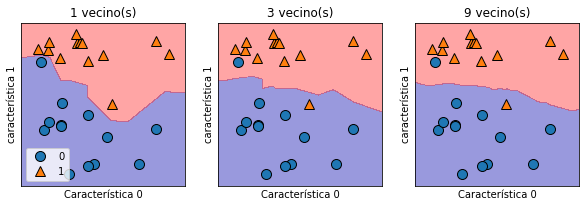

In [ ]:
# Para un clasificador con dos características

ig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    
# the fit method returns the object self, so we can instantiate
# and fit in one line

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} vecino(s)".format(n_neighbors))
    ax.set_xlabel("Característica 0")
    ax.set_ylabel("característica 1")
    axes[0].legend(loc=3)

> A partir de estos valores podemos deducir que dado un menor número de vecinos se da una aproximación más fiel a la frontera de los datos y entre mayor sea el número de vecinos menos adecuado será el modelo.

In [ ]:
# Utilizando la base de datos prediseñada para cancer de mama


cancer = load_breast_cancer()
X_trainC, X_testC, y_trainC, y_testC = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)


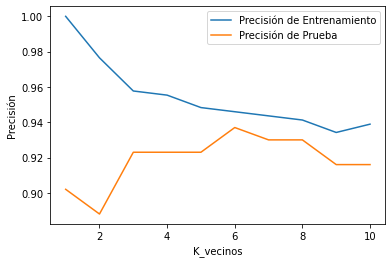

In [ ]:
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_trainC, y_trainC)
    # record training set accuracy
    training_accuracy.append(clf.score(X_trainC, y_trainC))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_testC, y_testC))
    
plt.plot(neighbors_settings, training_accuracy, label="Precisión de Entrenamiento")
plt.plot(neighbors_settings, test_accuracy, label="Precisión de Prueba")
plt.ylabel("Precisión")
plt.xlabel("K_vecinos")
plt.legend()

In [ ]:
dfmr = pd.read_csv('Brain Tumor.csv')
dfmr.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [ ]:
columns = dfmr.keys()
columns = list(columns)
columns.remove('Image')
columns.remove('Class')
columns

['Mean',
 'Variance',
 'Standard Deviation',
 'Entropy',
 'Skewness',
 'Kurtosis',
 'Contrast',
 'Energy',
 'ASM',
 'Homogeneity',
 'Dissimilarity',
 'Correlation',
 'Coarseness']

In [ ]:
dfmr[columns]

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [ ]:
# Analogía con un nuevo set de datos.

# Dadas sólo las columnas del DataFrame que contienen atributos construimos el set de datos
# corresponde a X en la construcción del modelo
dfmrd = dfmr[columns]
tumorset = np.array(dfmrd)
print(tumorset)
# Con la columna de clase ('Class') obtenemos la categoría a la que pertenece cada paciente 
# es decir si contiene o no un tumor.
tumorclass = np.array(dfmr['Class'])
print('---------------------------------------------------------')
print(tumorclass)

[[6.53533936e+000 6.19587845e+002 2.48915215e+001 ... 4.47334559e+000
  9.81938697e-001 7.45834073e-155]
 [8.74996948e+000 8.05957634e+002 2.83893930e+001 ... 3.22007157e+000
  9.88834396e-001 7.45834073e-155]
 [7.34109497e+000 1.14380822e+003 3.38202339e+001 ... 5.98179980e+000
  9.78013693e-001 7.45834073e-155]
 ...
 [1.80115204e+001 1.15158276e+003 3.39349785e+001 ... 5.10369972e+000
  9.52181237e-001 7.45834073e-155]
 [1.33304291e+001 9.45732779e+002 3.07527686e+001 ... 6.43978421e+000
  9.40898110e-001 7.45834073e-155]
 [6.11013794e+000 4.80884025e+002 2.19290680e+001 ... 6.78732909e+000
  9.38730786e-001 7.45834073e-155]]
---------------------------------------------------------
[0 0 1 ... 0 0 0]


In [ ]:
load_breast_cancer().data.shape


(569, 30)

In [ ]:
load_breast_cancer().target.shape

(569,)

In [ ]:
tumorset.shape #13 atributos

(3762, 13)

In [ ]:
tumorclass.shape #3762 sujetos en la BD

(3762,)

In [ ]:
#Segmentación del set de datos
xt_train, xt_test, yt_train, yt_test = train_test_split(tumorset, tumorclass, stratify=tumorclass,random_state=66)

In [ ]:
print(len(xt_train))

2821/3762


2821


0.7498670919723551

In [ ]:
KnnTum = KNeighborsClassifier(n_neighbors=3)

In [ ]:
KnnTum.fit(xt_train,yt_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predicted_vals = KnnTum.predict(xt_test)

In [ ]:
print("Test set accuracy: {:.2f}".format(KnnTum.score(xt_test, yt_test)))

Test set accuracy: 0.81


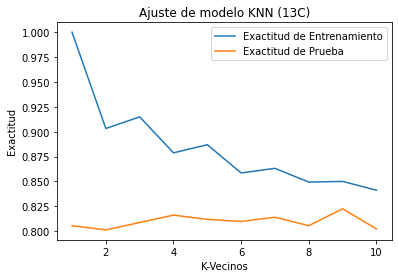

In [ ]:
train_accuracy = []
tst_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xt_train, yt_train)
    # record training set accuracy
    train_accuracy.append(clf.score(xt_train, yt_train))
    # record generalization accuracy
    tst_accuracy.append(clf.score(xt_test, yt_test))
    
    
    
plt.plot(neighbors_settings, train_accuracy,label='Exactitud de Entrenamiento')
plt.plot(neighbors_settings, tst_accuracy,label="Exactitud de Prueba")
plt.ylabel("Exactitud")
plt.xlabel("K-Vecinos")
plt.title('Ajuste de modelo KNN (13C)')
plt.legend()

In [ ]:
 from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
?roc_curve

In [ ]:
#lab =['positivo','negativo']
#auc_rocs = roc_curve(lab, predicted_vals, xt_test)

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yt_test,predicted_vals)
print('AUROC para KNN: ', roc_auc_score(yt_test, predicted_vals))

AUROC para KNN:  0.8043120774712225


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(yt_test,predicted_vals))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       520
           1       0.80      0.76      0.78       421

    accuracy                           0.81       941
   macro avg       0.81      0.80      0.81       941
weighted avg       0.81      0.81      0.81       941



In [ ]:
confusion_matrix(yt_test,predicted_vals)

array([[440,  80],
       [100, 321]])

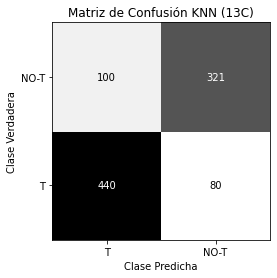

In [ ]:
plt.title('Matriz de Confusión KNN (13C)')
mglearn.tools.heatmap(confusion_matrix(yt_test,predicted_vals), xlabel='Clase Predicha',ylabel='Clase Verdadera', xticklabels=['T','NO-T'],yticklabels=['T','NO-T'], cmap=plt.cm.gray_r, fmt="%d")

Text(0.5, 1.0, 'Matriz de Confusión KNN (13C)')

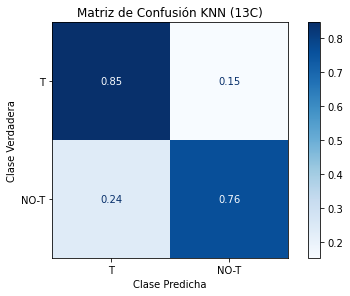

In [ ]:

cnf_matrix = confusion_matrix(yt_test, predicted_vals)
cm = confusion_matrix(yt_test,predicted_vals,normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['T','NO-T'])
cmd.plot(cmap=plt.cm.Blues,values_format='.2f')
plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión KNN (13C)')


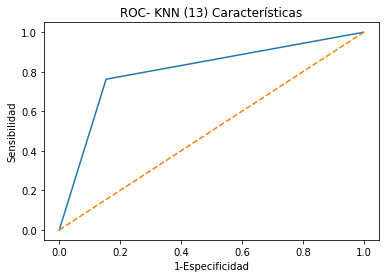

In [ ]:
plt.title('ROC- KNN (13) Características')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [ ]:
# Entrenando el modelo con menos atributos y los más adecuados
newcol = ['Entropy','Energy','ASM','Homogeneity']
dfmrt = dfmr[newcol]
tumorsetd = np.array(dfmrt)
xtd_train, xtd_test, ytd_train, ytd_test = train_test_split(tumorsetd, tumorclass, stratify=tumorclass,random_state=66)

In [ ]:
KnnTum.fit(xtd_train,ytd_train)

KNeighborsClassifier(n_neighbors=3)

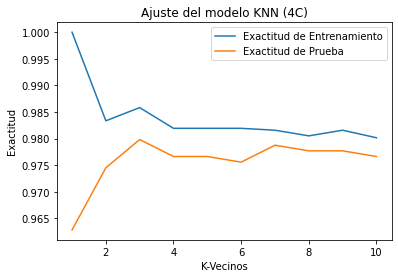

In [ ]:
train_accuracy = []
tst_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xtd_train, ytd_train)
    # record training set accuracy
    train_accuracy.append(clf.score(xtd_train, ytd_train))
    # record generalization accuracy
    tst_accuracy.append(clf.score(xtd_test, ytd_test))
    
plt.plot(neighbors_settings, train_accuracy, label="Exactitud de Entrenamiento")
plt.plot(neighbors_settings, tst_accuracy, label="Exactitud de Prueba")
plt.ylabel("Exactitud")
plt.xlabel("K-Vecinos")
plt.title('Ajuste del modelo KNN (4C)')
plt.legend()

In [ ]:
predicted_valsd = KnnTum.predict(xtd_test)
print("Test set accuracy: {:.2f}".format(KnnTum.score(xtd_test, ytd_test)))

Test set accuracy: 0.98


In [ ]:
false_positive_rate1d, true_positive_rate1d, threshold1d = roc_curve(ytd_test,predicted_valsd)
print('AUROC para KNN D: ', roc_auc_score(ytd_test, predicted_valsd))

AUROC para KNN D:  0.9785652293075097


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytd_test,predicted_valsd))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       520
           1       0.99      0.97      0.98       421

    accuracy                           0.98       941
   macro avg       0.98      0.98      0.98       941
weighted avg       0.98      0.98      0.98       941



In [ ]:
confusion_matrix(ytd_test,predicted_valsd)

array([[515,   5],
       [ 14, 407]])

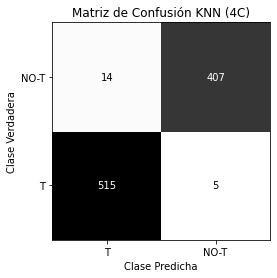

In [ ]:
plt.title('Matriz de Confusión KNN (4C)')
mglearn.tools.heatmap(confusion_matrix(ytd_test,predicted_valsd), xlabel='Clase Predicha',ylabel='Clase Verdadera', xticklabels=['T','NO-T'],yticklabels=['T','NO-T'], cmap=plt.cm.gray_r, fmt="%d")



Text(0.5, 1.0, 'Matriz de Confusión KNN (4C)')

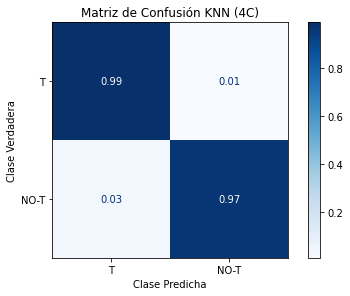

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cnf_matrix = confusion_matrix(ytd_test, predicted_valsd)
cm = confusion_matrix(ytd_test,predicted_valsd,normalize='true')
cmd = ConfusionMatrixDisplay(cm, display_labels=['T','NO-T'])
cmd.plot(cmap=plt.cm.Blues,values_format='.2f')

plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión KNN (4C)')


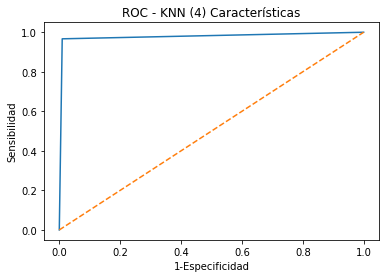

In [ ]:
plt.title('ROC - KNN (4) Características')
plt.plot(false_positive_rate1d, true_positive_rate1d)
plt.plot([0, 1], ls="--")
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
import scipy.stats

In [ ]:
#Cargamos los datos
Datos=pd.read_csv('Brain Tumor.csv')
X=np.array(Datos.drop(['Class','Image'],axis=1))
y=np.array(Datos['Class'])
#Establecemos al primer modelo
kVecinos = KnnTum
#Decidimos cómo vamos a dividir los datos para el primer modelo
kfold = KFold(n_splits=30, shuffle=True, random_state=0)
#Calculamos los resultados de la exactitud del modelos bajo esas diferentes elecciones:
scoresDefault = cross_val_score(kVecinos, xtd_train,ytd_train,cv=kfold)
#Desplejamos los valores
print('--------------------------Deafult Scores-----------------------')
print(scoresDefault)
ScoresROC = cross_val_score(kVecinos, xtd_test,ytd_test,cv=kfold,scoring='roc_auc')
print('---------------------------ROC Scores---------------------------')
print(ScoresROC)
Scoresf1 = cross_val_score(kVecinos, xtd_test,ytd_test,cv=kfold,scoring='f1')
print('--------------------------f1 Scores-----------------------------')
print(Scoresf1)

In [ ]:
sensibilidad=[]
especificidad=[]
vpp=[]
vpn=[]

for i in range(0,30):
    X_train, X_test, y_train, y_test = train_test_split(tumorsetd, tumorclass, stratify=y,random_state=i)
    KnnTum.fit(X_train,y_train)
    y_pred = KnnTum.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    VP=confusion[0,0]
    VN=confusion[1,1]
    FP=confusion[1,0]
    FN=confusion[0,1]
    Sensibilidad=(VP)/(VP+FN)
    Especificidad=(VN)/(FP+VN)
    VPP=(VP)/(VP+FP)
    VPN=(VN)/(VN+FN)
    sensibilidad.append(Sensibilidad)
    especificidad.append(Especificidad)
    vpp.append(VPP)
    vpn.append(VPN)

In [ ]:
DatosKnn=pd.DataFrame()
DatosKnn['sensibilidad']=np.array(sensibilidad)
DatosKnn['especificidad']=np.array(especificidad)
DatosKnn['vpp']=np.array(vpp)
DatosKnn['vpn']=np.array(vpn)
DatosKnn['f1']=Scoresf1
DatosKnn['exactitud']=scoresDefault
DatosKnn['roc_auc']=ScoresROC
DatosKnn.to_csv('DatosKnn.csv')

DatosLalo=pd.read_csv('DatosKnn.csv')
DatosLalo

### Árboles de decisión 

> Los árboles de decisión son un modelo útil para problemas de clasificación y regresión son usados principalmente cómo secuencias condicionales de if/else con el objetivo final de llegar a una decisión.

> Son construidos a partir de una condición inicial de segmentación de la información continuando con divisiones siguientes en los segmentos consecutivos, permiten identificar un comportamiento debido al refinamiento que tienen para discriminar datos.

> Dependen de su profundidad y que tan puro ha sido su crecimiento

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
# árbol de decisión con una profundidad fija

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
select = SelectFromModel(KnnTum,threshold="median")

In [ ]:
select.fit(xtd_train,ytd_train)



In [ ]:
from sklearn.feature_selection import RFE

select = RFE(KnnTum,n_features_to_select=8)
select.fit(xtd_train, ytd_train)
# visualize the selected features:

mask = select.get_support()

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")